# **IMPORT PACKAGE**

In [1]:
import pandas as pd
import datetime
import os

# **DATA DEFINITION**

Pada bagian ini, dipetakan keyword yang akan digunakan untuk proses scrapping (per lapangan usaha), berikut juga dengan batasan waktu dari artikel yang ingin diambil. Di Badan Pusat Statistik, terdapat 17 sektor lapangan usaha, meliputi:
1.	Pertanian, Kehutanan, dan Perikanan
2.	Pertambangan dan Penggalian
3.	Industri Pengolahan
4.	Pengadaan Listrik, Gas
5.	Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6.	Konstruksi
7.	Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8.	Transportasi dan Pergudangan
9.	Penyediaan Akomodasi dan Makan Minum
10.	Informasi dan Komunikasi
11.	Jasa Keuangan dan Asuransi	
12.	Real Estat	
13.	Jasa Perusahaan
14.	Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15.	Jasa Pendidikan
16.	Jasa Kesehatan dan Kegiatan Sosial
17.	Jasa lainnya

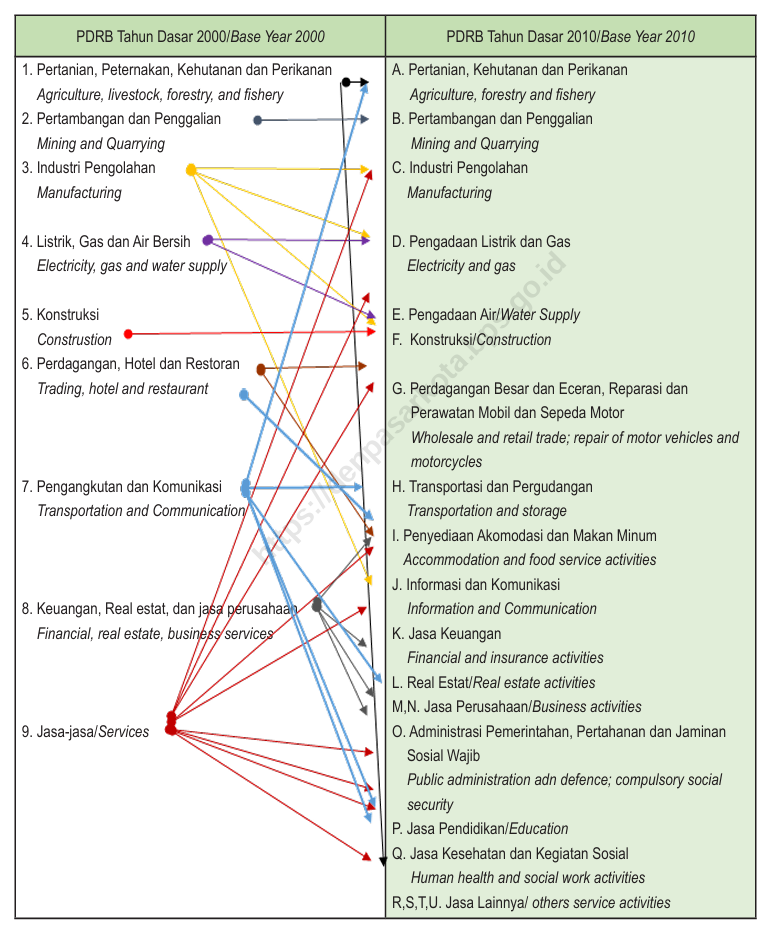

In [2]:
# Tentukan keywords dari masing-masing lapangan usaha
key_sektor = ['jasa perusahaan','umk','penyewaan']

keywords_scrap = key_sektor

# Tentukan rentang tanggal
start_date = datetime.date(2024, 10, 1)
end_date = datetime.date(2024, 11, 12)

# **SCRAPPING, PRE-CLEANING, & EXPORT (Scrapping BaliPost Lama)**

## 1. BaliPost

Fungsi dan package untuk scrapping di balipost ada pada kode di chunk berikut \
Aktifkan kalau pencarian di balipost sudah berjalan normal (saat kode ini dibuat sangat lambat)

In [3]:
# import requests
# from bs4 import BeautifulSoup
# import datetime
# import pandas as pd

# # Fungsi untuk melakukan scraping dari BaliPost
# def scrape_balipost(keyword, start_date, end_date, max_results, max_pages):
#     """
#     Fungsi untuk melakukan scraping artikel dari situs BaliPost berdasarkan keyword dan rentang tanggal.

#     Args:
#     - keyword (str): Keyword pencarian.
#     - start_date (datetime.date): Tanggal awal.
#     - end_date (datetime.date): Tanggal akhir.
#     - max_results (int): Maksimum jumlah artikel yang diambil.
#     - max_pages (int): Maksimum jumlah halaman yang diambil.

#     Returns:
#     - results (list): Daftar artikel yang berisi judul, link, tanggal, keyword, dan isi.
#     """
#     results = []

#     # Mengganti spasi dengan tanda "+" untuk keyword yang lebih dari satu kata
#     search_keyword = keyword.replace(" ", "+")
#     base_url = f"https://www.balipost.com/search/{search_keyword}"
#     current_page = 1

#     while len(results) < max_results and current_page <= max_pages:
#         url = f"{base_url}/page/{current_page}" if current_page > 1 else base_url
#         print(f"Scraping halaman {current_page} dari URL: {url}")
#         response = requests.get(url)

#         if response.status_code != 200:
#             print(f"Error saat mengakses halaman {current_page}. Status code: {response.status_code}")
#             break

#         soup = BeautifulSoup(response.content, "html.parser")
#         articles = soup.find_all("div", class_="td_module_10 td_module_wrap td-animation-stack")

#         if not articles:
#             print(f"Tidak ada artikel di halaman {current_page}, berhenti scraping.")
#             break

#         for article in articles:
#             title_element = article.find("h3", class_="entry-title td-module-title")
#             if title_element:
#                 title = title_element.text.strip()
#                 link = article.find("a")["href"]

#                 date_element = article.find("time", class_="entry-date updated td-module-date")
#                 if date_element:
#                     date_str = date_element["datetime"][:10]
#                     date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

#                     # Cek apakah tanggal artikel dalam rentang yang diinginkan
#                     if not (start_date <= date <= end_date):
#                         continue

#                 content_element = article.find("div", class_="td-excerpt")
#                 content = content_element.text.strip() if content_element else ""

#                 results.append({"title": title, "keyword": keyword, "source": "BaliPost", "link": link, "date": date, "content": content})
#                 if len(results) >= max_results:
#                     break

#         pagination = soup.find("a", class_="page", title=str(current_page + 1))
#         if pagination:
#             current_page += 1
#         else:
#             break

#     return results


Memulai proses scrapping berita

In [4]:
# # Step 4: Scraping untuk setiap keyword
# # Takes a LOOOOOOOOOOOONG time

# all_news = []

# for keyword in keywords_scrap:
#     print(f"\nMemulai scraping untuk keyword: {keyword}")
#     news = scrape_balipost(keyword, start_date, end_date, max_results=25, max_pages=3)

#     # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
#     num_articles = len(news)
#     print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

#     all_news.extend(news)

# # Step 5: Simpan hasil ke dalam file Excel
# berita_balipost = pd.DataFrame(all_news)
# berita_balipost

In [5]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor13_triwulan4_bali.xlsx")
# berita_balipost

Pre-cleaning \
Hasil Scrapping BaliPost harus difilter terlebih dahulu wilayah (dari isi konten) dan judulnya (kadang tidak sesuai dengan kata yang diinginkan) \
Contoh: Kata kunci --> Ikan || Judul ditemukan --> DicarIKAN, DijanjIKAN

In [6]:
# # Keyword to filter out
# keywords_filter = ["TABANAN","SINGARAJA","DENPASAR","MANGUPURA","AMLAPURA","SEMARAPURA","NEGARA","GIANYAR","BANGLI"]

# # Build the condition for multiple keywords
# pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# # Filter out rows where 'Description' contains the keyword
# berita_balipost_2 = pd.DataFrame(berita_balipost[berita_balipost['content'].str.contains(pattern, case=False, na=False)])

# # Show the filtered DataFrame
# print(berita_balipost_2.shape)
# berita_balipost_2

In [7]:
# # Build the regular expression pattern with word boundaries
# pattern_1 = r'\b(' + '|'.join(keywords_scrap) + r')\b'  # Ensures "Ikan" is a whole word

# # Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
# berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]

# # Show the filtered DataFrame
# print(berita_balipost_3.shape)
# berita_balipost_3

In [8]:
# # Remove Duplication
# berita_balipost_3 = berita_balipost_3.drop_duplicates(subset='title', keep='first')
# print(berita_balipost_3.shape)
# berita_balipost_3

## 2. DetikBali

In [9]:
import math
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define web scraping functions
# Fungsi untuk menuju ke portal berita
def search_url(query, date_start, date_end, pages_num=1):
    url = f"https://www.detik.com/search/searchnews?query={query}&siteid=123&sortby=time&fromdatex={date_start}&todatex={date_end}&page={pages_num}&result_type=relevansi"
    
    print(url)
    response = requests.get(url)
    page = bs(response.content, "html.parser")

    return page

# Fungsi untuk menghitung jumlah artikel di halaman terakhir
def last_page_article_count(query, date_start, date_end, page_num):
    last_page = search_url(query, date_start, date_end, page_num)
    article_list = last_page.find("div", {"class": "list-content"})

    if article_list:
        articles = article_list.find_all('article', class_='list-content__item')           
    article_count = len(articles)
    
    return article_count

def news_search_results(query, date_start, date_end):
    page = search_url(query, date_start, date_end)
    
    pagination = page.find("div", {"class": "pagination"})
    if pagination:
        page_numbers = pagination.find_all('a', class_='pagination__item')
        if page_numbers:
            last_page_number = int(page_numbers[-2].text)

        # Menghitung jumlah artikel di halaman terakhir
        last_page_articles = last_page_article_count(query, date_start, date_end, last_page_number)

        # Menghitung jumlah artikel yang diperoleh
        num = (last_page_number - 1) * 10 + last_page_articles
    else:
        num = 0
        last_page_number = 1
    
    return num, last_page_number

# Fungsi untuk mendapatkan isi konten
def news_get_content(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    content_list = []
    multiple_page = content_page.find("div", {"class": "detail__multiple"})
    if multiple_page:
        multiple_page = [x.get("href") for x in multiple_page.find_all("a")][:-1]
        for page in multiple_page:
            response = requests.get(page)
            content_page = bs(response.content, "html.parser")
            content_list.extend([p.get_text() for p in content_page.find_all("p") if not p.get_text().startswith('\n\n\n\nHalaman\n\n') and
                                p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    'Selengkapnya di halaman selanjutnya.',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])
    else:
        content_list.extend([p.get_text() for p in content_page.find_all("p")
                            if p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])

    content_list = '\n\n'.join(content_list)

    return content_list

# Fungsi untuk mengecek berita yang merupakan advertorial
def news_advertorial_check(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    author = content_page.find("meta", {"content": "Advertorial"})

    return bool(author)

# Fungsi untuk mencari artikel dengan output adalah jumlah artikel dan halaman terakhir
def search_articles(query, from_date, to_date, ads_article, article_content):
    results_num, last_page = news_search_results(query, from_date, to_date)
        
    print(f"Result num: {results_num}")
    print(f"Last page: {last_page}")

    return results_num, last_page

# Fungsi untuk memperoleh list artikel
def articles_list(query, from_date, to_date, ads_article, article_content, num_articles, last_page):
    article_lists = []
    pages = math.ceil(num_articles / 10)
    
    print("\nMemulai Scrapping dari DetikBali untuk keyword:", query)
    for i in range(1, pages + 1):
        print("Scrapping halaman", i, "dari URL: ")
        page = search_url(query, from_date, to_date, i)
        articles = page.find_all("article", class_="list-content__item")

        for article in articles:
            title = article.find("a", {"class": "media__link"}).get('dtr-ttl')
            category = article.find('h2', class_='media__subtitle').text.strip()
            publish_date = article.find('span', title=True).get('title')
            article_url = article.find("a", {"class": "media__link"}).get('href')
                
            # print(f"Title: {title}")
            # print(f"Category: {category}")
            # print(f"Publish Date: {publish_date}")
            # print(f"Article URL: {article_url}")

            if ads_article and news_advertorial_check(article_url):
                continue
            else:
                if article_content:
                    content = news_get_content(article_url)
                    if (
                        any(title in existing_article["title"] for existing_article in article_lists) or 
                        any(content in existing_article["content"] for existing_article in article_lists)
                    ):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "source": category,
                            "link": article_url,
                            "date": publish_date,
                            "content": content
                        })
                else:
                    if any(title in existing_article["title"] for existing_article in article_lists):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "link": article_url,
                            "date": publish_date
                        })
            if len(article_lists) == num_articles:
                break
        if len(article_lists) == num_articles:
            break
            
    print(f"Jumlah artikel dengan kata kunci {keyword}: {len(article_lists)} artikel.")
    data = article_lists
    return data

In [10]:
# Scraping untuk setiap keyword
all_news_detik = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = articles_list(search_keyword, start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y'), False, True, 25, 5)
    all_news_detik.extend(news)

# Simpan hasil ke dalam file Excel
berita_detik = pd.DataFrame(all_news_detik) 
berita_detik


Memulai Scrapping dari DetikBali untuk keyword: jasa+perusahaan
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=jasa+perusahaan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=jasa+perusahaan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=2&result_type=relevansi
Scrapping halaman 3 dari URL: 
https://www.detik.com/search/searchnews?query=jasa+perusahaan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=3&result_type=relevansi
Jumlah artikel dengan kata kunci jasa perusahaan: 25 artikel.

Memulai Scrapping dari DetikBali untuk keyword: umk
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=umk&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=umk&siteid=123&

,title,keyword,source,link,date,content
0,15 Twibbon Hari Pahlawan 2024 untuk Memperinga...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7628821/15...,"Sabtu, 09 Nov 2024 06:30 WIB",Hari Pahlawan diperingati setiap 10 November. ...
1,Wulan Guritno Resmi Mundur dari Komisaris Klub...,jasa+perusahaan,detikBali,https://www.detik.com/bali/bisnis/d-7635540/wu...,"Selasa, 12 Nov 2024 21:41 WIB",Wulan Guritno memutuskan untuk mengundurkan di...
2,Puluhan ASN Dijemur 4 Jam karena Tak Ikut Upac...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7635602/pu...,"Selasa, 12 Nov 2024 23:04 WIB",Sebanyak 97 Aparatur Sipil Negara (ASN) Pemeri...
3,Sutjidra Tawarkan Revitalisasi Terminal-Subsid...,jasa+perusahaan,detikBali,https://www.detik.com/bali/pilkada/d-7635544/s...,"Selasa, 12 Nov 2024 21:50 WIB",Calon bupati Buleleng nomor urut 2 Nyoman Sutj...
4,"Kelola Jasa Tur Memancing di Bali, Kakak Adik ...",jasa+perusahaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Sabtu, 02 Nov 2024 13:38 WIB",Kakak beradik asal Serbia berinisal DM (31) da...
5,Identitas 5 Korban Tewas-Luka Berat Kecelakaan...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7634685/id...,"Selasa, 12 Nov 2024 14:05 WIB",Kecelakaan maut beruntun melibatkan 17 kendara...
6,"Kejari Selamatkan Uang Negara Rp 1,5 Miliar da...",jasa+perusahaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Selasa, 12 Nov 2024 18:56 WIB","Kejaksaan Negeri (Kejari) Lombok Tengah, Nusa ..."
7,Bos Garuda Indonesia Beberkan Tiga Penyebab Ti...,jasa+perusahaan,detikBali,https://www.detik.com/bali/bisnis/d-7633975/bo...,"Selasa, 12 Nov 2024 07:13 WIB",Direktur Utama PT Garuda Indonesia (Persero) T...
8,Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7578772/me...,"Selasa, 08 Okt 2024 22:37 WIB",Menteri Kelautan dan Perikanan Sakti Wahyu Tre...
9,Mahendra Buka Peluang Tambah Modal PT Jamkrida...,jasa+perusahaan,detikBali,https://www.detik.com/bali/bisnis/d-7633040/ma...,"Senin, 11 Nov 2024 15:34 WIB",Penjabat (Pj) Gubernur Bali Sang Made Mahendra...


Pre-cleaning

In [11]:
# Filter Wilayah
keywords_filter = ["Tabanan","Singaraja","Denpasar","Badung","Karangasem","Klungkung","Jembrana","Gianyar","Bangli"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_detik_2 = pd.DataFrame(berita_detik[berita_detik['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_detik_2.shape)
berita_detik_2

(24, 6)


,title,keyword,source,link,date,content
3,Sutjidra Tawarkan Revitalisasi Terminal-Subsid...,jasa+perusahaan,detikBali,https://www.detik.com/bali/pilkada/d-7635544/s...,"Selasa, 12 Nov 2024 21:50 WIB",Calon bupati Buleleng nomor urut 2 Nyoman Sutj...
4,"Kelola Jasa Tur Memancing di Bali, Kakak Adik ...",jasa+perusahaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Sabtu, 02 Nov 2024 13:38 WIB",Kakak beradik asal Serbia berinisal DM (31) da...
8,Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7578772/me...,"Selasa, 08 Okt 2024 22:37 WIB",Menteri Kelautan dan Perikanan Sakti Wahyu Tre...
10,Perusahaan Cucu Soeharto Pinjam Duit Rp 500 M ...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7613349/pe...,"Rabu, 30 Okt 2024 10:49 WIB",PT Intra Golflink Resorts Tbk (GOLF) melalui a...
13,Perusahaan PLTU Celukan Bawang Bantah Larang P...,jasa+perusahaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Kamis, 03 Okt 2024 16:34 WIB","PT General Energi Bali (GEB), perusahaan pemba..."
14,Karyawan PLTU Celukan Bawang Laporkan Direksi ...,jasa+perusahaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Rabu, 02 Okt 2024 16:08 WIB",Karyawan Pembangkit Listrik Tenaga Uap (PLTU) ...
16,"Hari Pahlawan, Pj Sekda Badung Ajak Anak Muda ...",jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7632633/ha...,"Senin, 11 Nov 2024 13:35 WIB",Pemerintah Kabupaten Badung menggelar Upacara ...
17,Pemkab Buleleng Luncurkan Inovasi Dua Layanan ...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7633756/pe...,"Senin, 11 Nov 2024 21:11 WIB",Pemerintah Kabupaten (Pemkab) Buleleng meluncu...
19,"Atasi TBC di Indonesia, Budi: Gunakan Tes PCR-...",jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7632981/at...,"Senin, 11 Nov 2024 15:09 WIB",Menteri Kesehatan (Menkes) Budi Gunadi Sadikin...
22,OJK Beberkan Bahaya Pay Later: Sulit Lamar Ker...,jasa+perusahaan,detikBali,https://www.detik.com/bali/bisnis/d-7628774/oj...,"Jumat, 08 Nov 2024 14:56 WIB",Otoritas Jasa Keuangan (OJK) mengingatkan masy...


In [12]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_detik_3.shape)
berita_detik_3

(2, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_10332\1307647291.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]


,title,keyword,source,link,date,content
28,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,penyewaan,detikBali,https://www.detik.com/bali/berita/d-7580744/pe...,"Kamis, 10 Okt 2024 08:57 WIB","Desa Adat Bugbug, Karangasem, Bali, kembali be..."
29,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,penyewaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Kamis, 10 Okt 2024 19:53 WIB",Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...


Menghapus berita yang duplikat

In [13]:
# Remove Duplication
berita_detik_4 = berita_detik_3.drop_duplicates(subset='title', keep='first')
print(berita_detik_4.shape)
berita_detik_4

(2, 6)


,title,keyword,source,link,date,content
28,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,penyewaan,detikBali,https://www.detik.com/bali/berita/d-7580744/pe...,"Kamis, 10 Okt 2024 08:57 WIB","Desa Adat Bugbug, Karangasem, Bali, kembali be..."
29,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,penyewaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Kamis, 10 Okt 2024 19:53 WIB",Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...


## 3. RadarBali

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime

# Tanggal batas yang ingin dibandingkan
start_date = datetime(2024, 10, 1)  # 1 Oktober 2024
end_date = datetime(2024, 12, 31)  # 31 Desember 2024

# Inisialisasi driver Chrome tanpa mengunduh chromedriver secara manual
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Fungsi untuk melakukan scraping dan mengambil isian kelas latest__subtitle, latest__link, dan latest__date
def get_news(query, start_page, end_page):
    results = []

    print("\nMemulai scrapping RadarBali untuk keyword:", query)
    for page in range(start_page, end_page + 1):
        url = f"https://radarbali.jawapos.com/search?q={query}&sort=latest&page={page}"
        print("Scrapping halaman",page,"dari URL:",url)
        driver.get(url)
        time.sleep(10)  # Tunggu beberapa detik agar halaman selesai dimuat

        # Ambil konten halaman dan buat objek BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Ambil semua elemen dengan class latest__item
        articles = soup.find_all('div', class_='latest__item')

        # Ambil informasi dari setiap artikel
        for article in articles:
            subtitle = article.find('h4', class_='latest__subtitle')
            title = article.find('a', class_='latest__link')
            link = article.find('a', class_='latest__link')['href']
            date = article.find('date', class_='latest__date')

            # Menampilkan hasil jika elemen ditemukan, filter tanggal sesuai yang diinginkan
            if subtitle and title and date:
                date_berita = date.get_text(strip=True)

                # Fungsi untuk mengonversi nama bulan menjadi angka bulan
                def get_month_number(month_name):
                    months = {
                        "Januari": 1,
                        "Februari": 2,
                        "Maret": 3,
                        "April": 4,
                        "Mei": 5,
                        "Juni": 6,
                        "Juli": 7,
                        "Agustus": 8,
                        "September": 9,
                        "Oktober": 10,
                        "November": 11,
                        "Desember": 12
                    }
                    return months.get(month_name)

                # Fungsi untuk mem-parsing tanggal dalam format yang diberikan
                def parse_date(date_str):
                    # Pisahkan hari dan waktu
                    day_part, time_part = date_str.split(" | ")

                    # Ambil tanggal dan bulan dari bagian day_part
                    day_name, day, month_name, year = day_part.split()
                    day = int(day)
                    year = int(year)
                    month = get_month_number(month_name)
                    
                    # Gabungkan menjadi format yang bisa diproses oleh datetime
                    # Format waktu seperti '21:46 WIB', jadi kita hanya perlu ambil jam dan menit
                    time = time_part.replace(" WIB", "")

                    # Gabungkan semuanya ke format yang sesuai dengan datetime
                    date_string = f"{year}-{month:02d}-{day:02d} {time}"

                    # Mengonversi ke objek datetime
                    return datetime.strptime(date_string, "%Y-%m-%d %H:%M")
            
                parsed_date = parse_date(date_berita)

                # Membandingkan apakah parsed_date berada dalam rentang 1 Oktober 2024 sampai 31 Desember 2024
                if start_date <= parsed_date <= end_date:
                    results.append({"title": title.get_text(strip=True), "keyword": query, "source": "RadarBali", "link": link, "date": date.get_text(strip=True), "content": subtitle.get_text(strip=True)})
                    # print("Subtitle:", subtitle.get_text(strip=True))
                    # print("Title:", title.get_text(strip=True))
                    # print("Link:", link)
                    # print("Date:", date.get_text(strip=True))
                    # print('-' * 80)
                else:
                    break

    return results

import pandas as pd

all_news_radarbali = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = get_news(search_keyword, start_page=1, end_page=5)

    # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
    num_articles = len(news)
    print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

    all_news_radarbali.extend(news)

driver.quit()


Memulai scrapping RadarBali untuk keyword: jasa+perusahaan
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=jasa+perusahaan&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=jasa+perusahaan&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=jasa+perusahaan&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=jasa+perusahaan&sort=latest&page=4
Scrapping halaman 5 dari URL: https://radarbali.jawapos.com/search?q=jasa+perusahaan&sort=latest&page=5
Jumlah artikel yang diekstrak untuk keyword 'jasa perusahaan': 25

Memulai scrapping RadarBali untuk keyword: umk
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=umk&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=umk&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=umk&sort=latest&page=3
Scrapping halaman 4 dari URL: 

In [15]:
berita_radarbali = pd.DataFrame(all_news_radarbali)
berita_radarbali

,title,keyword,source,link,date,content
0,POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/bali/705310644/p...,"Kamis, 14 November 2024 | 21:57 WIB",Bali
1,"Ikut Biayai Pembangunan Bandara Bali Utara, Pe...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/buleleng/7053109...,"Kamis, 14 November 2024 | 17:55 WIB",Buleleng
2,Rivan A. Purwantono Pastikan Korban Tabrakan B...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/nasional/7053051...,"Selasa, 12 November 2024 | 18:47 WIB",Nasional
3,Jasa Raharja Proaktif Data Korban Tabrakan Ber...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/nasional/7053020...,"Senin, 11 November 2024 | 23:00 WIB",Nasional
4,Sugianto Karyawan Perusahaan Roti Jual Motor d...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/hukum-kriminal/7...,"Sabtu, 9 November 2024 | 11:15 WIB",Hukum & Kriminal
5,"Gelar Rakornas, Pembina Samsat Tingkat Nasiona...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/nasional/7052925...,"Sabtu, 9 November 2024 | 09:13 WIB",Nasional
6,"Tingkatkan Literasi Keuangan Global, OJK Gelar...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/ekonomi/70529247...,"Sabtu, 9 November 2024 | 08:40 WIB",Ekonomi & Perbankan
7,"Mulai Memasuki Musim Hujan, PDAM Tabanan Perke...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/tabanan/70528852...,"Jumat, 8 November 2024 | 17:15 WIB",Tabanan
8,Jasa Raharja Raih Penghargaan sebagai Best BUM...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/ekonomi/70528890...,"Jumat, 8 November 2024 | 09:38 WIB",Ekonomi & Perbankan
9,GoTo Group Luncurkan Program Makan Bergizi Gra...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/nasional/7052874...,"Kamis, 7 November 2024 | 20:05 WIB",Nasional


In [16]:
# Remove Duplication
berita_radarbali_2 = berita_radarbali.drop_duplicates(subset='title', keep='first')
print(berita_radarbali_2.shape)
berita_radarbali_2

(25, 6)


,title,keyword,source,link,date,content
0,POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/bali/705310644/p...,"Kamis, 14 November 2024 | 21:57 WIB",Bali
1,"Ikut Biayai Pembangunan Bandara Bali Utara, Pe...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/buleleng/7053109...,"Kamis, 14 November 2024 | 17:55 WIB",Buleleng
2,Rivan A. Purwantono Pastikan Korban Tabrakan B...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/nasional/7053051...,"Selasa, 12 November 2024 | 18:47 WIB",Nasional
3,Jasa Raharja Proaktif Data Korban Tabrakan Ber...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/nasional/7053020...,"Senin, 11 November 2024 | 23:00 WIB",Nasional
4,Sugianto Karyawan Perusahaan Roti Jual Motor d...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/hukum-kriminal/7...,"Sabtu, 9 November 2024 | 11:15 WIB",Hukum & Kriminal
5,"Gelar Rakornas, Pembina Samsat Tingkat Nasiona...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/nasional/7052925...,"Sabtu, 9 November 2024 | 09:13 WIB",Nasional
6,"Tingkatkan Literasi Keuangan Global, OJK Gelar...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/ekonomi/70529247...,"Sabtu, 9 November 2024 | 08:40 WIB",Ekonomi & Perbankan
7,"Mulai Memasuki Musim Hujan, PDAM Tabanan Perke...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/tabanan/70528852...,"Jumat, 8 November 2024 | 17:15 WIB",Tabanan
8,Jasa Raharja Raih Penghargaan sebagai Best BUM...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/ekonomi/70528890...,"Jumat, 8 November 2024 | 09:38 WIB",Ekonomi & Perbankan
9,GoTo Group Luncurkan Program Makan Bergizi Gra...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/nasional/7052874...,"Kamis, 7 November 2024 | 20:05 WIB",Nasional


In [17]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_radarbali_3 = berita_radarbali_2.copy()
berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_radarbali_3.shape)
berita_radarbali_3

(0, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_10332\2112746010.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]


,title,keyword,source,link,date,content


In [18]:
berita_radarbali_4 = berita_radarbali_3.copy()

# Nilai yang ingin kita hapus
values_to_remove = ['Sportmania','Foto Mania','Berita Daerah']
columns_to_check = ['content']

# Hapus baris yang memiliki nilai tersebut di sembarang kolom
berita_radarbali_4 = berita_radarbali_4[~berita_radarbali_4[columns_to_check].apply(lambda row: row.isin(values_to_remove).any(), axis=1)]
print(berita_radarbali_4.shape)
berita_radarbali_4


(0, 0)


""


## Export All (Combined)

### Raw Data Hasil Scrapping

In [19]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor13_triwulan4_bali.xlsx")

In [20]:
# berita_balipost.head()

In [21]:
berita_detik.head()

,title,keyword,source,link,date,content
0,15 Twibbon Hari Pahlawan 2024 untuk Memperinga...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7628821/15...,"Sabtu, 09 Nov 2024 06:30 WIB",Hari Pahlawan diperingati setiap 10 November. ...
1,Wulan Guritno Resmi Mundur dari Komisaris Klub...,jasa+perusahaan,detikBali,https://www.detik.com/bali/bisnis/d-7635540/wu...,"Selasa, 12 Nov 2024 21:41 WIB",Wulan Guritno memutuskan untuk mengundurkan di...
2,Puluhan ASN Dijemur 4 Jam karena Tak Ikut Upac...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7635602/pu...,"Selasa, 12 Nov 2024 23:04 WIB",Sebanyak 97 Aparatur Sipil Negara (ASN) Pemeri...
3,Sutjidra Tawarkan Revitalisasi Terminal-Subsid...,jasa+perusahaan,detikBali,https://www.detik.com/bali/pilkada/d-7635544/s...,"Selasa, 12 Nov 2024 21:50 WIB",Calon bupati Buleleng nomor urut 2 Nyoman Sutj...
4,"Kelola Jasa Tur Memancing di Bali, Kakak Adik ...",jasa+perusahaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Sabtu, 02 Nov 2024 13:38 WIB",Kakak beradik asal Serbia berinisal DM (31) da...


In [22]:
berita_radarbali.head()

,title,keyword,source,link,date,content
0,POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/bali/705310644/p...,"Kamis, 14 November 2024 | 21:57 WIB",Bali
1,"Ikut Biayai Pembangunan Bandara Bali Utara, Pe...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/buleleng/7053109...,"Kamis, 14 November 2024 | 17:55 WIB",Buleleng
2,Rivan A. Purwantono Pastikan Korban Tabrakan B...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/nasional/7053051...,"Selasa, 12 November 2024 | 18:47 WIB",Nasional
3,Jasa Raharja Proaktif Data Korban Tabrakan Ber...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/nasional/7053020...,"Senin, 11 November 2024 | 23:00 WIB",Nasional
4,Sugianto Karyawan Perusahaan Roti Jual Motor d...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/hukum-kriminal/7...,"Sabtu, 9 November 2024 | 11:15 WIB",Hukum & Kriminal


In [23]:
# Tambahkan berita_balipost pada pd_concat jika data scrapping bali post tersedia
raw_data_combined = pd.concat([berita_detik, berita_radarbali], ignore_index=True) # Hilangkan berita_balipost jika tidak ada hasil scrapping dari BaliPost
# raw_data_combined = raw_data_combined.drop('Unnamed: 0', axis=1)
raw_data_combined

,title,keyword,source,link,date,content
0,15 Twibbon Hari Pahlawan 2024 untuk Memperinga...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7628821/15...,"Sabtu, 09 Nov 2024 06:30 WIB",Hari Pahlawan diperingati setiap 10 November. ...
1,Wulan Guritno Resmi Mundur dari Komisaris Klub...,jasa+perusahaan,detikBali,https://www.detik.com/bali/bisnis/d-7635540/wu...,"Selasa, 12 Nov 2024 21:41 WIB",Wulan Guritno memutuskan untuk mengundurkan di...
2,Puluhan ASN Dijemur 4 Jam karena Tak Ikut Upac...,jasa+perusahaan,detikBali,https://www.detik.com/bali/berita/d-7635602/pu...,"Selasa, 12 Nov 2024 23:04 WIB",Sebanyak 97 Aparatur Sipil Negara (ASN) Pemeri...
3,Sutjidra Tawarkan Revitalisasi Terminal-Subsid...,jasa+perusahaan,detikBali,https://www.detik.com/bali/pilkada/d-7635544/s...,"Selasa, 12 Nov 2024 21:50 WIB",Calon bupati Buleleng nomor urut 2 Nyoman Sutj...
4,"Kelola Jasa Tur Memancing di Bali, Kakak Adik ...",jasa+perusahaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Sabtu, 02 Nov 2024 13:38 WIB",Kakak beradik asal Serbia berinisal DM (31) da...
...,...,...,...,...,...,...
61,"Punya Nilai Plus, di Jembrana PLTS Mulai Dilir...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/jembrana/7051820...,"Kamis, 10 Oktober 2024 | 19:15 WIB",Jembrana
62,Nitha Direktur Flame SPA Dijebloskan ke Rutan ...,jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/hukum-kriminal/7...,"Selasa, 8 Oktober 2024 | 00:25 WIB",Hukum & Kriminal
63,"Dukung Tujuan Pembangunan Berkelanjutan, Astra...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/otomotif/7051711...,"Senin, 7 Oktober 2024 | 21:00 WIB",Otomotif
64,"Liku-Liku Hidup Angri Dianto Kofi, Mantan Bur...",jasa+perusahaan,RadarBali,https://radarbali.jawapos.com/features/7051697...,"Senin, 7 Oktober 2024 | 19:50 WIB",Features


In [24]:
raw_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaraw_combined_sektor13_2024_triwulan4_bali.xlsx")

### Clean Data

In [25]:
# print(berita_balipost_3.shape)
# berita_balipost_3.head()

In [26]:
print(berita_detik_4.shape)
berita_detik_4.head()

(2, 6)


,title,keyword,source,link,date,content
28,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,penyewaan,detikBali,https://www.detik.com/bali/berita/d-7580744/pe...,"Kamis, 10 Okt 2024 08:57 WIB","Desa Adat Bugbug, Karangasem, Bali, kembali be..."
29,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,penyewaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Kamis, 10 Okt 2024 19:53 WIB",Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...


In [27]:
print(berita_radarbali_4.shape)
berita_radarbali_4.head()

(0, 0)


""


In [28]:
# Tambahkan berita_balipost_3 pada pd_concat jika data scrapping bali post tersedia
clean_data_combined = pd.concat([berita_detik_4, berita_radarbali_4], ignore_index=True)
# clean_data_combined = clean_data_combined.drop('Unnamed: 0', axis=1)
clean_data_combined

,title,keyword,source,link,date,content
0,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,penyewaan,detikBali,https://www.detik.com/bali/berita/d-7580744/pe...,"Kamis, 10 Okt 2024 08:57 WIB","Desa Adat Bugbug, Karangasem, Bali, kembali be..."
1,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,penyewaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Kamis, 10 Okt 2024 19:53 WIB",Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...


In [29]:
clean_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor13_2024_triwulan4_bali.xlsx")

# **SENTIMENT ANALYSIS**

## Dataset Preparation

In [30]:
clean_data = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor13_2024_triwulan4_bali.xlsx")
clean_data

,Unnamed: 0,title,keyword,source,link,date,content
0,0,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,penyewaan,detikBali,https://www.detik.com/bali/berita/d-7580744/pe...,"Kamis, 10 Okt 2024 08:57 WIB","Desa Adat Bugbug, Karangasem, Bali, kembali be..."
1,1,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,penyewaan,detikBali,https://www.detik.com/bali/hukum-dan-kriminal/...,"Kamis, 10 Okt 2024 19:53 WIB",Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...


In [31]:
clean_data_2 = clean_data.drop(['link','date','source'], axis=1)
clean_data_2

,Unnamed: 0,title,keyword,content
0,0,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,penyewaan,"Desa Adat Bugbug, Karangasem, Bali, kembali be..."
1,1,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,penyewaan,Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...


## Preprocessing Judul Bahasa Indonesia

In [32]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import BertTokenizer

# Download stopwords dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Inisialisasi Stemmer (Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Tokenizer IndoBERT (atau BERT)
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

In [34]:
# Fungsi Preprocessing
def preprocess_text(text):
    # 1. Mengubah teks ke huruf kecil
    text = text.lower()

    # 2. Menghapus URL, mention, hashtag, dan angka
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Menghapus URL
    text = re.sub(r"@\w+", "", text)  # Menghapus mention (@username)
    text = re.sub(r"#\w+", "", text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Menghapus angka

    # 3. Menghapus tanda baca (jika diperlukan)
    text = re.sub(r"[^\w\s]", "", text)  # Menghapus tanda baca

    # 4. Tokenisasi menggunakan NLTK
    words = word_tokenize(text)  # Memecah kalimat menjadi kata

    # # 5. Menghapus stop words (menggunakan NLTK)
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # 6. Stemming dengan Sastrawi
    words = [stemmer.stem(word) for word in words]

    # 7. Menggabungkan kembali kata-kata menjadi kalimat
    cleaned_text = " ".join(words)

    # 8. Tokenisasi menggunakan IndoBERT tokenizer (optional: untuk input model)
    input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True)
    
    return cleaned_text, input_ids

In [35]:
clean_data_3 = clean_data_2.copy()

# Terapkan fungsi preprocess_text ke kolom 'description'
clean_data_3['cleaned_title'], clean_data_3['input_ids'] = zip(*clean_data_3['title'].apply(preprocess_text))

In [36]:
print(clean_data_3.shape)
clean_data_3

(2, 6)


,Unnamed: 0,title,keyword,content,cleaned_title,input_ids
0,0,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,penyewaan,"Desa Adat Bugbug, Karangasem, Bali, kembali be...",sewa lahan hektare ujung desa adat bugbug kemb...,"[3, 12682, 4005, 8501, 5091, 2019, 4542, 9554,..."
1,1,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,penyewaan,Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...,kelian bugbug klaim sewa tanah hektare sudah s...,"[3, 31762, 1476, 9554, 26809, 8503, 12682, 229..."


## Translate Judul ke Bahasa Inggris dan Preprocessing

In [37]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


Fungsi translator

In [38]:
from googletrans import Translator
import pandas as pd

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translator = Translator()
    try:
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [39]:
clean_data_4 = clean_data_3.copy()

# Menerapkan fungsi translate_to_english pada kolom "Title"
clean_data_4['title_translated'] = clean_data_4['title'].apply(translate_to_english)

# Menampilkan dataframe setelah perubahan
print(clean_data_4.shape)
clean_data_4

(2, 7)


,Unnamed: 0,title,keyword,content,cleaned_title,input_ids,title_translated
0,0,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,penyewaan,"Desa Adat Bugbug, Karangasem, Bali, kembali be...",sewa lahan hektare ujung desa adat bugbug kemb...,"[3, 12682, 4005, 8501, 5091, 2019, 4542, 9554,...",1 hectare land rental leading to the Bugbug tr...
1,1,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,penyewaan,Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...,kelian bugbug klaim sewa tanah hektare sudah s...,"[3, 31762, 1476, 9554, 26809, 8503, 12682, 229...",Kelian Bugbug claims 1 hectare land rental is ...


In [40]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
# Load the model
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    """
    Perform basic text cleaning including:
    - Lowercasing
    - Removing punctuation and special characters
    - Removing extra spaces
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (using regular expressions)
    text = re.sub(f"[{string.punctuation}]", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# def remove_stopwords(text):
#     """
#     Remove stopwords from the text.
#     """
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     # Filter out stopwords
#     filtered_text = [word for word in word_tokens if word not in stop_words]
    
#     return ' '.join(filtered_text)

def lemmatize_text(text):
    """
    Lemmatize the text to reduce words to their base form.
    """
    doc = nlp(text)
    
    # Lemmatize each token (word) and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

def preprocess_text(text):
    """
    Complete preprocessing pipeline:
    1. Clean the text (remove punctuation, lowercase)
    2. Remove stopwords
    3. Lemmatize the text
    """
    text = clean_text(text)
    # text = remove_stopwords(text)
    text = lemmatize_text(text)
    
    return text


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
clean_data_4['cleaned_title_translated'] = clean_data_4['title_translated'].apply(preprocess_text)

print(clean_data_4.shape)
clean_data_4

(2, 8)


,Unnamed: 0,title,keyword,content,cleaned_title,input_ids,title_translated,cleaned_title_translated
0,0,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,penyewaan,"Desa Adat Bugbug, Karangasem, Bali, kembali be...",sewa lahan hektare ujung desa adat bugbug kemb...,"[3, 12682, 4005, 8501, 5091, 2019, 4542, 9554,...",1 hectare land rental leading to the Bugbug tr...,1 hectare land rental lead to the bugbug tradi...
1,1,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,penyewaan,Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...,kelian bugbug klaim sewa tanah hektare sudah s...,"[3, 31762, 1476, 9554, 26809, 8503, 12682, 229...",Kelian Bugbug claims 1 hectare land rental is ...,kelian bugbug claim 1 hectare land rental be i...


## Sentimen Decision + Word Cloud + Export Result

In [42]:
data_ready = clean_data_4.copy()
data_ready.head()

,Unnamed: 0,title,keyword,content,cleaned_title,input_ids,title_translated,cleaned_title_translated
0,0,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,penyewaan,"Desa Adat Bugbug, Karangasem, Bali, kembali be...",sewa lahan hektare ujung desa adat bugbug kemb...,"[3, 12682, 4005, 8501, 5091, 2019, 4542, 9554,...",1 hectare land rental leading to the Bugbug tr...,1 hectare land rental lead to the bugbug tradi...
1,1,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,penyewaan,Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...,kelian bugbug klaim sewa tanah hektare sudah s...,"[3, 31762, 1476, 9554, 26809, 8503, 12682, 229...",Kelian Bugbug claims 1 hectare land rental is ...,kelian bugbug claim 1 hectare land rental be i...


### 1. TextBlob

#### Sentiment

In [43]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [44]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

,keyword,title_translated,cleaned_title_translated
0,penyewaan,1 hectare land rental leading to the Bugbug tr...,1 hectare land rental lead to the bugbug tradi...
1,penyewaan,Kelian Bugbug claims 1 hectare land rental is ...,kelian bugbug claim 1 hectare land rental be i...


In [45]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_10332\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_10332\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [46]:
data_sentiment1

,keyword,title_translated,cleaned_title_translated,sentiment_score_english,sentiment_category_english
0,penyewaan,1 hectare land rental leading to the Bugbug tr...,1 hectare land rental lead to the bugbug tradi...,0.0,Netral
1,penyewaan,Kelian Bugbug claims 1 hectare land rental is ...,kelian bugbug claim 1 hectare land rental be i...,0.0,Netral


In [47]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Netral    2
Name: count, dtype: int64

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


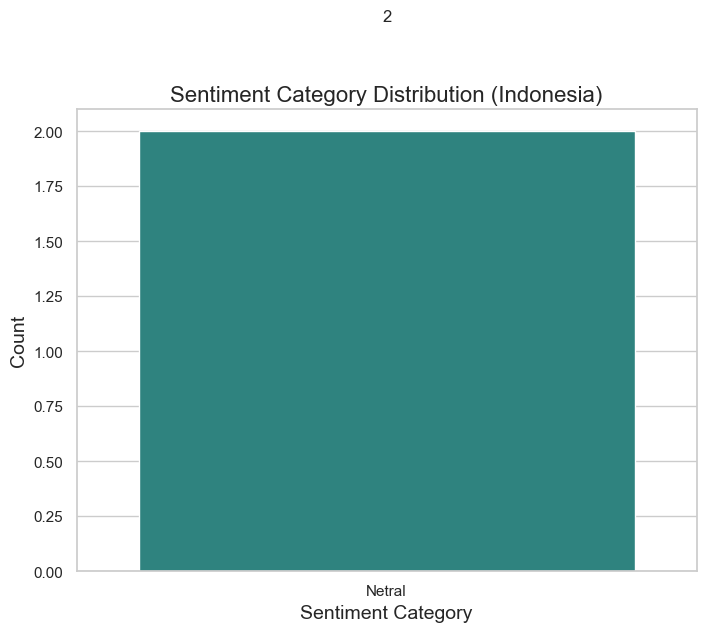

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


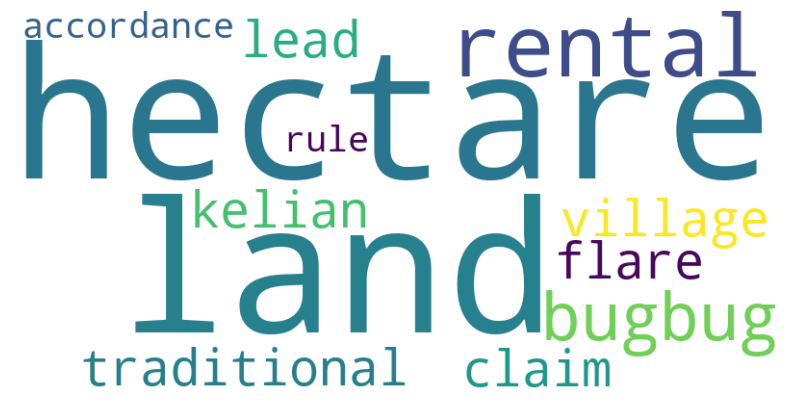

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

In [51]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else:
    print("Tidak ada sentimen positif pada berita")

Tidak ada sentimen positif pada berita


In [52]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

Tidak ada sentimen negatif pada berita


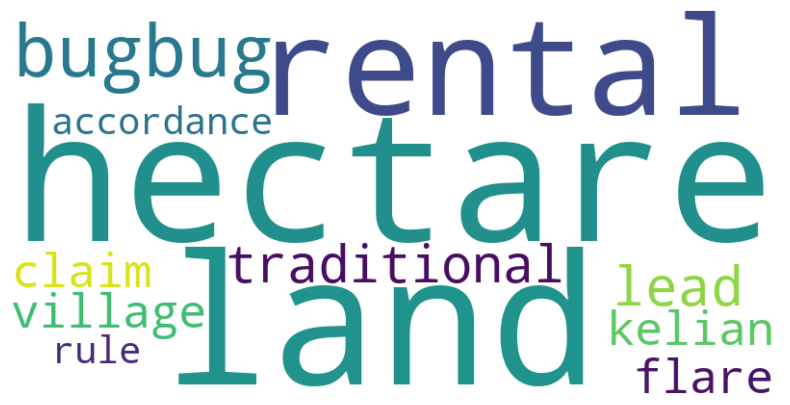

In [53]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 2. VADER

#### Sentiment

In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_10332\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_10332\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [56]:
data_sentiment1.head()

,keyword,title_translated,cleaned_title_translated,sentiment_score_english,sentiment_category_english,sentiment_score_english_vader,sentiment_category_english_vader
0,penyewaan,1 hectare land rental leading to the Bugbug tr...,1 hectare land rental lead to the bugbug tradi...,0.0,Netral,0.0,Netral
1,penyewaan,Kelian Bugbug claims 1 hectare land rental is ...,kelian bugbug claim 1 hectare land rental be i...,0.0,Netral,0.0,Netral


In [57]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Netral    2
Name: count, dtype: int64

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


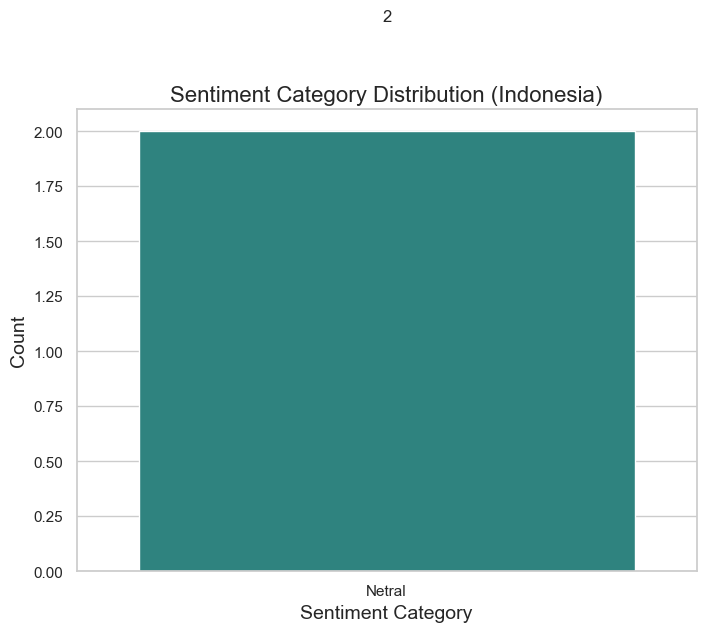

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

In [59]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

Tidak ada sentimen positif pada berita


In [60]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

Tidak ada sentimen negatif pada berita


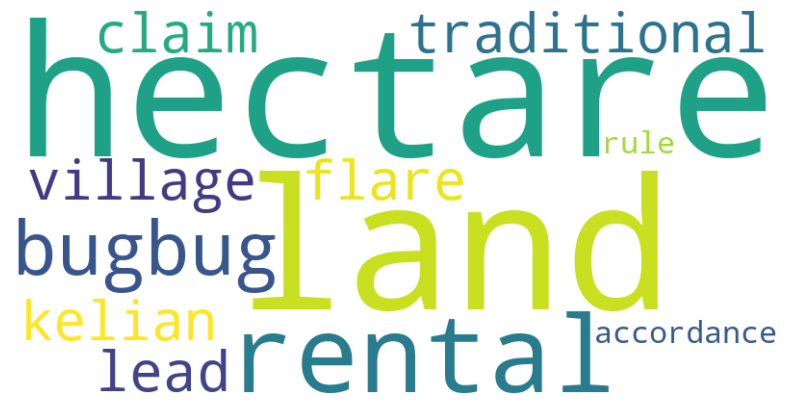

In [61]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 3. IndoBERT

#### Sentiment

In [62]:
pip install transforms torch

Note: you may need to restart the kernel to use updated packages.


In [63]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

,keyword,title,cleaned_title,content
0,penyewaan,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,sewa lahan hektare ujung desa adat bugbug kemb...,"Desa Adat Bugbug, Karangasem, Bali, kembali be..."
1,penyewaan,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,kelian bugbug klaim sewa tanah hektare sudah s...,Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...


In [64]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [65]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_10332\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_10332\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


,keyword,title,cleaned_title,content,sentiment_score_indonesia,sentiment_category_indonesia
0,penyewaan,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,sewa lahan hektare ujung desa adat bugbug kemb...,"Desa Adat Bugbug, Karangasem, Bali, kembali be...",0.995892,netral
1,penyewaan,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,kelian bugbug klaim sewa tanah hektare sudah s...,Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...,0.996357,netral


In [66]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral    2
Name: count, dtype: int64

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


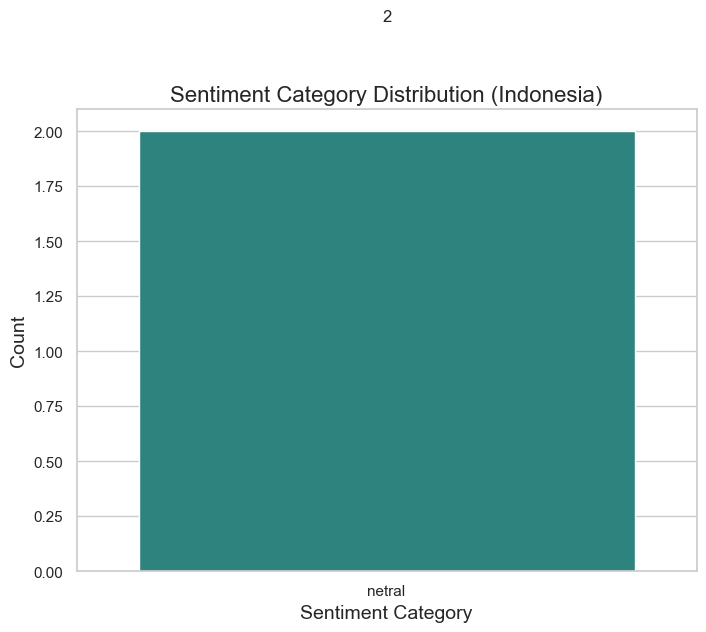

In [67]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

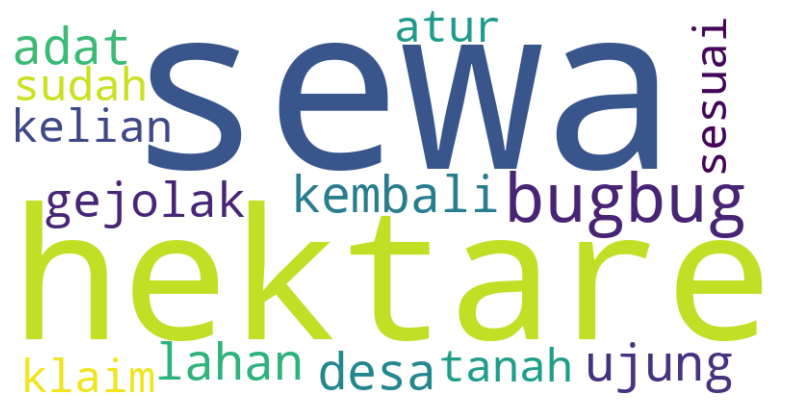

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

In [69]:
# Sentimen Positif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"].shape[0] != 0:
    data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

    # Create a word cloud
    wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

Tidak ada sentimen positif pada berita


In [70]:
# Sentimen Negatif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"].shape[0] != 0:
    data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

    # Create a word cloud
    wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

Tidak ada sentimen negatif pada berita


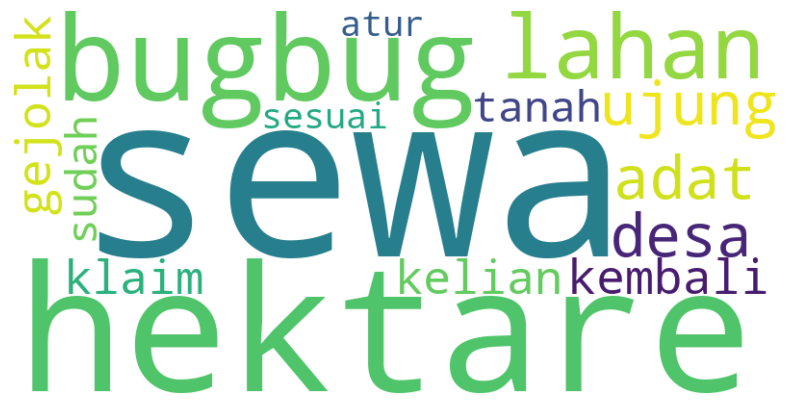

In [71]:
# Sentimen Netral
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"].shape[0] != 0:
    data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

    # Create a word cloud
    wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### Export Result

In [72]:
print(data_sentiment1.shape)
data_sentiment1.head()

(2, 7)


,keyword,title_translated,cleaned_title_translated,sentiment_score_english,sentiment_category_english,sentiment_score_english_vader,sentiment_category_english_vader
0,penyewaan,1 hectare land rental leading to the Bugbug tr...,1 hectare land rental lead to the bugbug tradi...,0.0,Netral,0.0,Netral
1,penyewaan,Kelian Bugbug claims 1 hectare land rental is ...,kelian bugbug claim 1 hectare land rental be i...,0.0,Netral,0.0,Netral


In [73]:
print(data_sentiment2.shape)
data_sentiment2.head()

(2, 6)


,keyword,title,cleaned_title,content,sentiment_score_indonesia,sentiment_category_indonesia
0,penyewaan,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,sewa lahan hektare ujung desa adat bugbug kemb...,"Desa Adat Bugbug, Karangasem, Bali, kembali be...",0.995892,netral
1,penyewaan,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,kelian bugbug klaim sewa tanah hektare sudah s...,Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...,0.996357,netral


In [74]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(2, 12)


,keyword,title,cleaned_title,content,sentiment_score_indonesia,sentiment_category_indonesia,title_translated,cleaned_title_translated,sentiment_category_english,sentiment_score_english,sentiment_category_english_vader,sentiment_score_english_vader
0,penyewaan,Penyewaan Lahan 1 Hektare Berujung Desa Adat B...,sewa lahan hektare ujung desa adat bugbug kemb...,"Desa Adat Bugbug, Karangasem, Bali, kembali be...",0.995892,netral,1 hectare land rental leading to the Bugbug tr...,1 hectare land rental lead to the bugbug tradi...,Netral,0.0,Netral,0.0
1,penyewaan,Kelian Bugbug Klaim Penyewaan Tanah 1 Hektare ...,kelian bugbug klaim sewa tanah hektare sudah s...,Kelian Desa Adat Bugbug Jro Nyoman Purwa Ngura...,0.996357,netral,Kelian Bugbug claims 1 hectare land rental is ...,kelian bugbug claim 1 hectare land rental be i...,Netral,0.0,Netral,0.0


In [75]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor13_triwulan4_bali.xlsx")